In [1]:
### Imports
#Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
#(You'll import sklearn as you need it.)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
#Read in the Ecommerce Customers csv file as a DataFrame called customers.
ecomm_data = pd.read_csv('Ecommerce Customers')

In [3]:
ecomm_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecomm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
ecomm_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
#Exploratory Data Analysis
#Use seaborn to create a jointplot to compare the 
#Time on Website and Yearly Amount Spent columns. 
#Does the correlation make sense?**
ecomm_data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


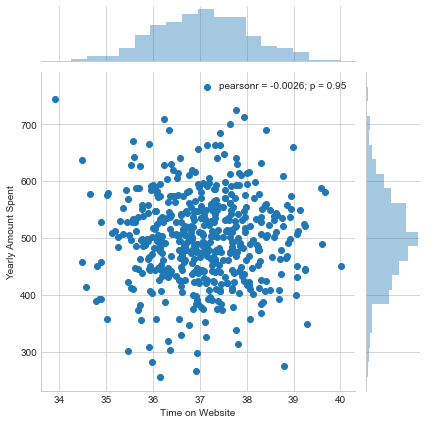

In [7]:
#ecomm_data['Time on Website']
sns.jointplot(x=ecomm_data["Time on Website"], y=ecomm_data["Yearly Amount Spent"], data=ecomm_data)

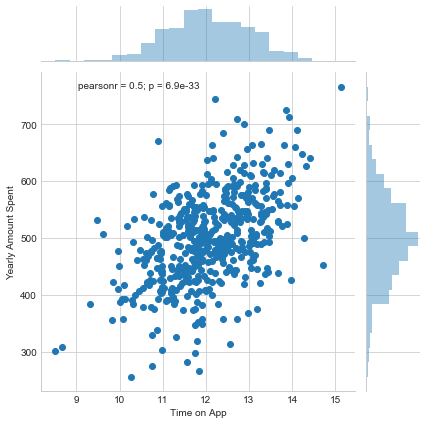

In [8]:
#Do the same but with the Time on App column instead.
sns.jointplot(x=ecomm_data["Time on App"], y=ecomm_data["Yearly Amount Spent"], data=ecomm_data)

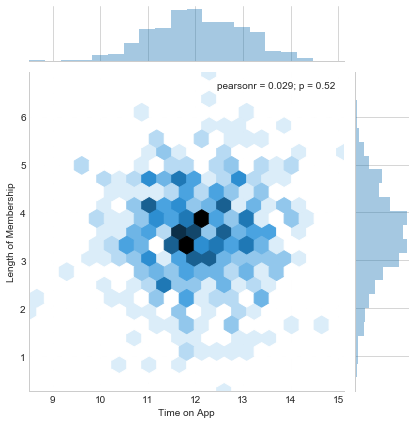

In [9]:
#Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.
sns.jointplot(x=ecomm_data["Time on App"], y=ecomm_data["Length of Membership"], data=ecomm_data, kind='hex')

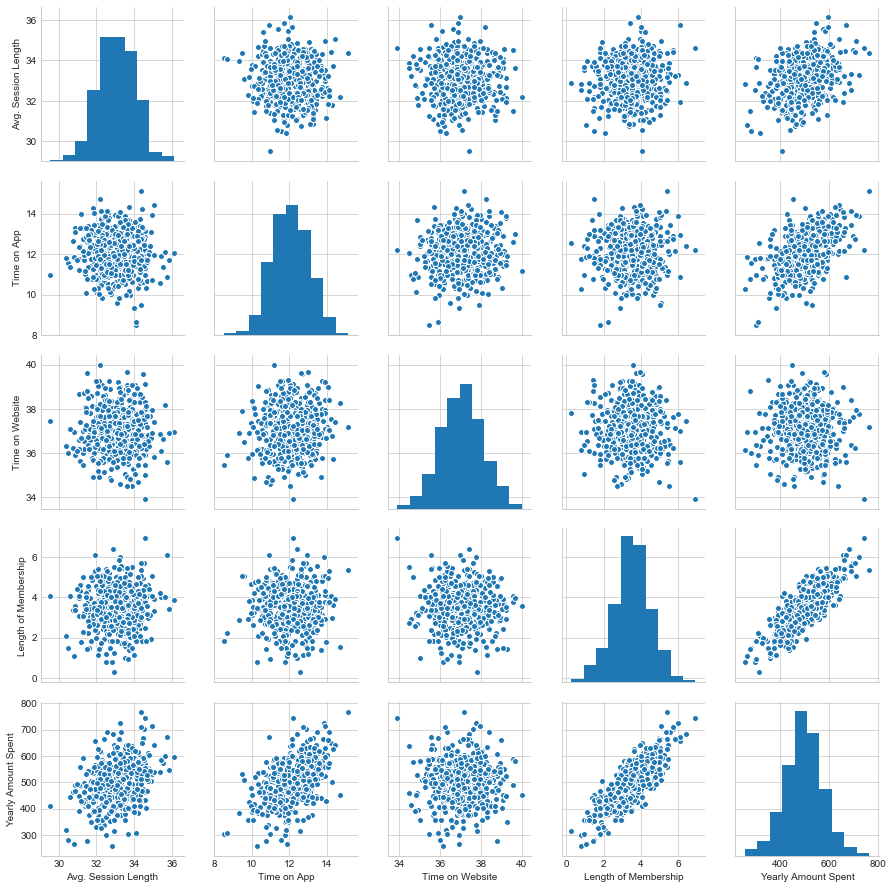

In [10]:
#Let's explore these types of relationships across the entire data set. 
#Use [pairplot]
#(https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) 
#to recreate the plot below.(Don't worry about the the colors)**
sns.pairplot( ecomm_data )

In [11]:
#Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
#Length of Membership

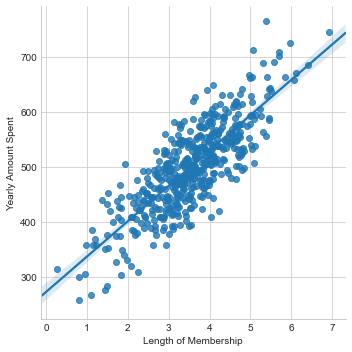

In [12]:
#Create a linear model plot (using seaborn's lmplot) of  
#Yearly Amount Spent vs. Length of Membership. 
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=ecomm_data)

In [13]:
### Training and Testing Data
#Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
#Set a variable X equal to the numerical features of the customers and a variable y 
#equal to the "Yearly Amount Spent" column. 

In [14]:
X = ecomm_data[['Avg. Session Length', 'Time on App', 
                'Time on Website', 'Length of Membership']]
y = ecomm_data['Yearly Amount Spent']

In [15]:
# Use model_selection.train_test_split from sklearn to split the data 
#into training and testing sets. 
#Set test_size=0.3 and random_state=101
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
### Training the Model
#Now its time to train our model on our training data!
#Import LinearRegression from sklearn.linear_model 
from sklearn.linear_model import LinearRegression

In [18]:
#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()

In [19]:
#Train/fit lm on the training data.
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#Print out the coefficients of the model
print lm.coef_

[ 25.98154972  38.59015875   0.19040528  61.27909654]


In [21]:
## Predicting Test Data

#Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [22]:
predictions = lm.predict(X_test)

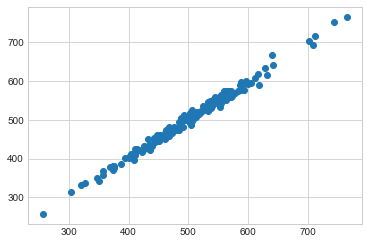

In [23]:
plt.scatter(y_test, predictions)

In [24]:
#Evaluating the Model
#Let's evaluate our model performance by 
#calculating the residual sum of squares and the explained variance score (R^2).

#Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 
#Refer to the lecture or to Wikipedia for the formulas
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 7.2281486534308383)
('MSE:', 79.813051650974614)
('RMSE:', 8.9338150669786422)


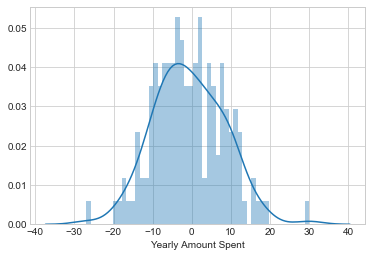

In [28]:
#Residuals

#You should have gotten a very good model with a good fit.
#Let's quickly explore the residuals to make sure everything was okay with our data. 
#Plot a histogram of the residuals and make sure it looks normally distributed.
#Use either seaborn distplot, or just plt.hist().


sns.distplot( (y_test-predictions),bins=50 )

In [30]:
### Conclusion
#We still want to figure out the answer to the original question,
#do we focus our efforst on mobile app or website development? 
#Or maybe that doesn't even really matter, and Membership Time is what is really important.  
#Let's see if we can interpret the coefficients at all to get an idea.
#Recreate the dataframe below.
pd.DataFrame(data=lm.coef_, index=['Avg. Session Length', 'Time on App', 'Time on Website',
                                  'Length of Membership'],)

,0
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
